In [1]:
import numpy as np
import matplotlib.pyplot as plt

import typing as tp

EpsilonGreedyBandit

In [2]:
class EpsilonGreedyBandit:
    def __init__(
        self,
        n_strategy: float,
        epsilon: float,
    ):
        self._epsilon = epsilon
        self._strategy_r = [1] * n_strategy  # тут храним награду
        self._strategy_n = [1] * n_strategy  # сколько раз обращались к ручке
        self._strategy_e = [1] * n_strategy  # ожидаемая награда
        
    def step(self) -> int:
        if np.random.random() < self._epsilon:
            return np.random.randint(0, len(self._strategy_r))
        return np.argmax(self._strategy_e)
    
    def update_weights(self, reward, i_strategy):
        self._strategy_r[i_strategy] += reward
        self._strategy_n[i_strategy] += 1
        self._strategy_e[i_strategy] = self._strategy_r[i_strategy] / self._strategy_n[i_strategy]

In [3]:
def strategy0():
    return np.random.choice([0, 1], p=[0.3, 0.7])

def strategy1():
    return np.random.choice([0, 1], p=[0.4, 0.6])

In [4]:
bandit = EpsilonGreedyBandit(2, 0.1)

for _ in range(10000):
    ind = bandit.step()
    if ind == 0:
        reward = strategy0()
    elif ind == 1:
        reward = strategy1()
    bandit.update_weights(reward, ind)

In [5]:
(((0.7 * 1) + (0.6 * 1)) / 2) * 10000

6499.999999999999

In [6]:
sum(bandit._strategy_r)

6974

In [8]:
bandit._strategy_n

[9490, 512]

In [226]:
# bandit._strategy_e

UCB bandit

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def strategy0():
    return np.random.choice([-1, 1], p=[0.3, 0.7])

def strategy1():
    return np.random.choice([-1, 1], p=[0.2, 0.8])


class Counter:
    def __init__(self, C: float = 0.1):
        self.n = 2
        self.c = 2


class UCBSocket:
    def __init__(self, common_counter):
        self._n = 1
        self._reward = 0
        self._counter = common_counter

    def sample(self):
        return (self._reward / self._n) + np.sqrt(self._counter.c * np.log(self._counter.n) / self._n)
    
    def update(self, reward):
        self._n += 1
        self._counter.n += 1
        self._reward += reward


counter = Counter()        
strategies = [strategy0, strategy1]
sockets = [UCBSocket(counter), UCBSocket(counter)]

for _ in range(1000):
    ind = np.argmax(list(map(lambda x: x.sample(), sockets)))
    socket = sockets[ind]
    reward = strategies[ind]()
    socket.update(reward)

In [25]:
# np

In [24]:
np.log(2.71)

0.9969486348916096

In [21]:
sockets[0]._n, sockets[1]._n

(4, 998)

Thompson Sampling Bandit (бинарный случай)

In [37]:
np.random.normal(0, 1)

0.568374768686361

In [119]:
import numpy as np
import matplotlib.pyplot as plt

class Strategy:
    def __init__(self, id: int):
        self.id = id
        self._success = 1 # кол-во успехов этого варианта
        self._fail = 1 # кол-во неудач этого варианта
        self._counter = 2 # счетчик испытаний именно этого варианта
        self._rate = 0.5
        # self._probability = p # вероятность - в реальности вероятности нет
        
    def sample(self):
        return np.random.beta(self._success, self._fail) # точка по бета - где находится между неудачами и успехом

    def action(self, result):
        self._counter += 1 # увеличиваем счетчик

        # сконвертировался или нет с заданной вероятностью этот вариант - здесь по идее нужен именно факт успеха.
        is_success = result #vnp.random.choice([0, 1], p=[1-self._probability, self._probability])
        if is_success:
            self._success += 1 # если сконвертировался - увеличиваем счетчик успеха
        else:
            self._fail += 1 # если не сконвертировался - увеличиваем счетчик неудачи
        self._rate = self._success / self._counter

class ModernStrategy(Strategy):
    def action(self):
        self._counter += 1
        if self._counter < 1000:
            is_success = np.random.choice([0, 1], p=[1-self._probability, self._probability])
        else:
            is_success = np.random.choice([0, 1], p=[0.1, 0.9])
        if is_success:
            self._success += 1
        else:
            self._fail += 1

strategies = [Strategy(id=1), Strategy(id=2), Strategy(id=3)] # в реальности вероятностей нет

history_1 = []
history_2 = []
history_3 = []

for _ in range(int(50000)):
    best_strategy = max(strategies, key=lambda x: x.sample())
    res = np.random.randint(0,2,1)
    best_strategy.action(res)
    #print(res, best_strategy.id)
    history_1.append(strategies[0]._counter)
    history_2.append(strategies[1]._counter)
    history_3.append(strategies[2]._counter)

strategies[0]._counter, strategies[0]._success, strategies[0]._fail

(6680, 3338, 3342)

In [120]:
strategies[0]._rate, strategies[1]._rate, strategies[2]._rate

(0.4997005988023952, 0.5028231686796545, 0.5015377193511428)

In [121]:
full = strategies[0]._rate + strategies[1]._rate + strategies[2]._rate # 100 процентов
probs_v1 = strategies[0]._rate / full
probs_v2 = strategies[1]._rate / full
probs_v3 = strategies[2]._rate / full

probs_v1, probs_v2, probs_v3

(0.33223415610123547, 0.3343102480061175, 0.33345559589264695)

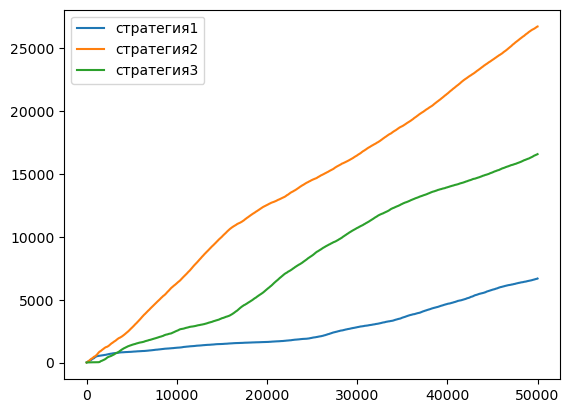

In [122]:
plt.plot(history_1)
plt.plot(history_2)
plt.plot(history_3)
plt.legend(['стратегия1', 'стратегия2', 'стратегия3'])
plt.show()